In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sklearn
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


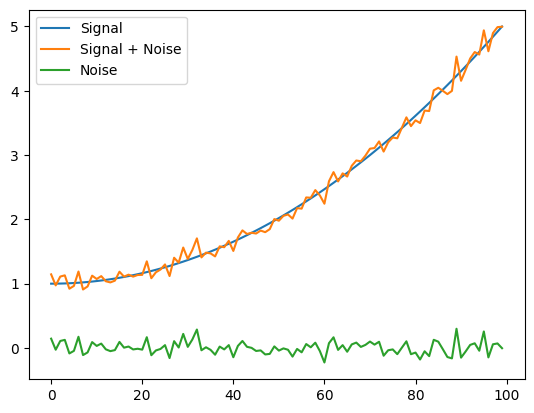

In [2]:
x1 = np.linspace(-1, 1, 100)
signal = x1**2 + 2*x1 + 2
noise = np.random.normal(0, 0.1, x1.shape)
y1 = signal + noise
plt.plot(signal, label='Signal')
plt.plot(y1, label='Signal + Noise')
plt.plot(noise, label='Noise')
plt.legend()
plt.show()


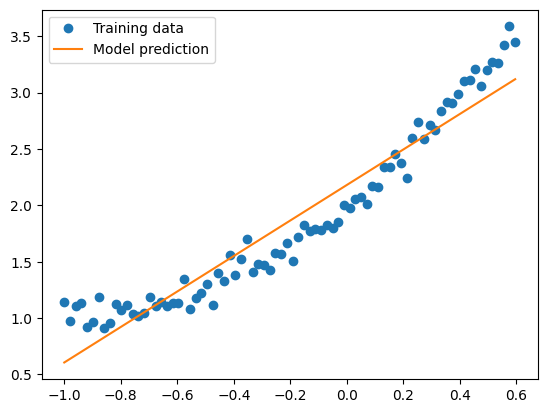

MSE for training data: 0.04829236347371833
R2 for training data: 0.9178400535456941
[2.18045235 1.57446288]
[0.60598947 0.6377968  0.66960413 0.70141146 0.73321879 0.76502612
 0.79683345 0.82864078 0.86044811 0.89225544 0.92406277 0.95587011
 0.98767744 1.01948477 1.0512921  1.08309943 1.11490676 1.14671409
 1.17852142 1.21032875 1.24213608 1.27394341 1.30575075 1.33755808
 1.36936541 1.40117274 1.43298007 1.4647874  1.49659473 1.52840206
 1.56020939 1.59201672 1.62382405 1.65563139 1.68743872 1.71924605
 1.75105338 1.78286071 1.81466804 1.84647537 1.8782827  1.91009003
 1.94189736 1.9737047  2.00551203 2.03731936 2.06912669 2.10093402
 2.13274135 2.16454868 2.19635601 2.22816334 2.25997067 2.291778
 2.32358534 2.35539267 2.3872     2.41900733 2.45081466 2.48262199
 2.51442932 2.54623665 2.57804398 2.60985131 2.64165864 2.67346598
 2.70527331 2.73708064 2.76888797 2.8006953  2.83250263 2.86430996
 2.89611729 2.92792462 2.95973195 2.99153929 3.02334662 3.05515395
 3.08696128 3.11876861]

In [3]:
x_train = x1[0:80]
y_train = y1[0:80]
#model with degree 2
degree = 2
X_train = np.column_stack([x_train**i for i in range(0, degree)])
#X_train = np.vander(x_train, N=degree, increasing=True)          #this is another way to create the Vandermonde matrix
model = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
# another method for model calculation
predicted = X_train.dot(model)
plt.plot(x_train, y_train, 'o', label='Training data')
plt.plot(x_train, predicted, label='Model prediction')
plt.legend()
plt.show()
mse_train = mean_squared_error(y_train, predicted)
r2_train = r2_score(y_train, predicted)
print('MSE for training data:', mse_train)
print('R2 for training data:', r2_train)
print(model)
print(predicted)
#print(X_train)
#print(y_train.shape)

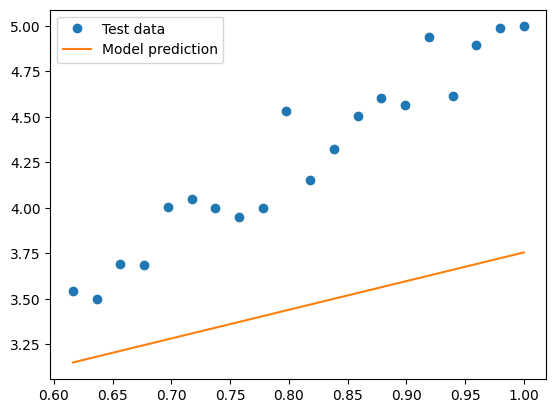

R2 on Test Data: -2.4112858959057504
Mean Squared Error on Test Data: 0.7700146894335411
model prediction on test data:
 [3.15057594 3.18238327 3.2141906  3.24599793 3.27780526 3.30961259
 3.34141993 3.37322726 3.40503459 3.43684192 3.46864925 3.50045658
 3.53226391 3.56407124 3.59587857 3.6276859  3.65949323 3.69130057
 3.7231079  3.75491523]


In [4]:
# model perforamance on test data
x_test = x1[80:100]
y_test = y1[80:100]
X_test = np.column_stack([x_test**i for i in range(0, degree)])
predicted_test = X_test.dot(model)
plt.plot(x_test, y_test, 'o', label='Test data')
plt.plot(x_test, predicted_test, label='Model prediction')
plt.legend()
plt.show()
mse = mean_squared_error(y_test, predicted_test)    
r_test = r2_score(y_test, predicted_test)
print('R2 on Test Data:', r_test)
print('Mean Squared Error on Test Data:', mse) 
print("model prediction on test data:\n", predicted_test)


### Another model evaluation for DOF = 5

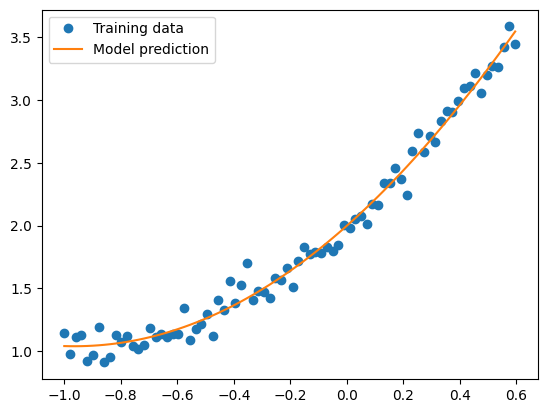

In [5]:
#model with degree 5
degree = 5
X_train2 = np.column_stack([x_train**i for i in range(0, degree)])
model = np.linalg.inv(X_train2.T.dot(X_train2)).dot(X_train2.T).dot(y_train)
predicted_train2 = X_train2.dot(model)
plt.plot(x_train, y_train, 'o', label='Training data')
plt.plot(x_train, predicted_train2, label='Model prediction')  
plt.legend()
plt.show()

Mean Squared Error on Training Data (Degree 5): 0.04829236347371833
R2 on Training Data (Degree 5): 0.9866525904745063
Mean Squared Error on Test Data (Degree 5): 0.018066908684989814
R2 on Test Data (Degree 5): 0.919960759677115


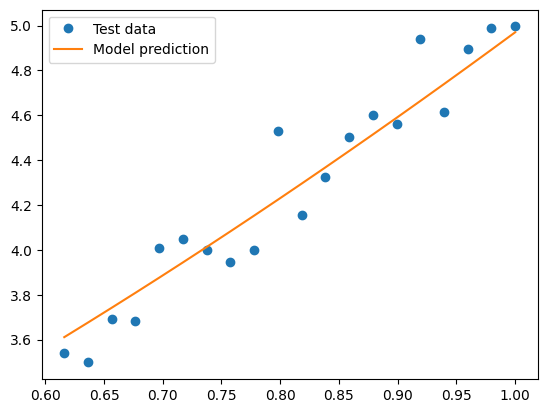

In [6]:
from sklearn.metrics import mean_squared_error
mse_train = mean_squared_error(y_train, predicted)
# model performance on test data
x_test = x1[80:100]
y_test = y1[80:100]
X_test2 = np.column_stack([x_test**i for i in range(0, degree)])
predicted_test2 = X_test2.dot(model)
mse_test = mean_squared_error(y_test, predicted_test2)
print('Mean Squared Error on Training Data (Degree 5):', mse_train) 
print('R2 on Training Data (Degree 5):', r2_score(y_train, predicted_train2))
print('Mean Squared Error on Test Data (Degree 5):', mse_test)
print('R2 on Test Data (Degree 5):', r2_score(y_test, predicted_test2))
plt.plot(x_test, y_test, 'o', label='Test data')
plt.plot(x_test, predicted_test2, label='Model prediction')  
plt.legend()
plt.show()


#### CONCLUSION - Model is not relevent (Linear regression) for this Data
#### Lets use regularization here to solve the overfitting problem


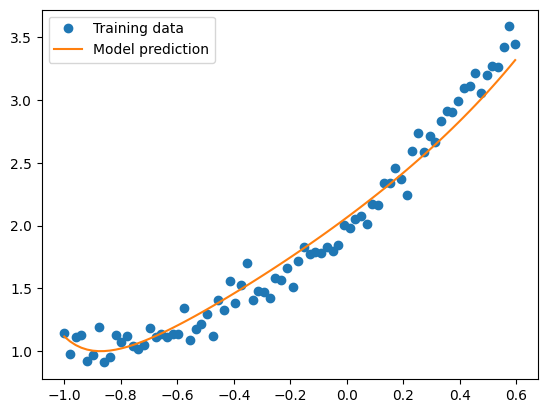

Mean Squared Error on Training Data (Degree 15): 0.01599207855741458
R2 on Training Data (Degree 15): 0.9727926275820961


: 

In [ ]:
# model with degree 15 using regularization (ridge regression)
from sklearn.linear_model import Ridge
degree = 15
model = Ridge(alpha=1.0)
X_train3 = np.column_stack([x_train**i for i in range(0, degree)])
model.fit(X_train3, y_train)
predicted_train3 = model.predict(X_train3)
plt.plot(x_train, y_train, 'o', label='Training data')
plt.plot(x_train, predicted_train3, label='Model prediction')
plt.legend()
plt.show()
mse_train = mean_squared_error(y_train, predicted_train3)
r2_train = r2_score(y_train, predicted_train3)
print('Mean Squared Error on Training Data (Degree 15):', mse_train)
print('R2 on Training Data (Degree 15):', r2_train)

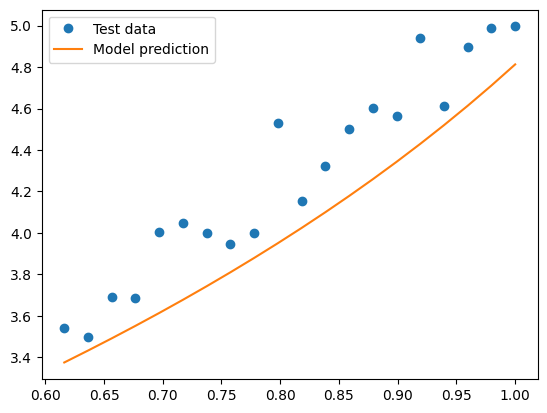

Mean Squared Error on Test Data (Degree 15): 0.08089828029555637
R2 on Test Data (Degree 15): 0.6416079246770268


In [8]:
# model performance on test data
X_test3 = np.column_stack([x_test**i for i in range(0, degree)])
predicted_test3 = model.predict(X_test3)
plt.plot(x_test, y_test, 'o', label='Test data')
plt.plot(x_test, predicted_test3, label='Model prediction')
plt.legend()
plt.show()
mse_test = mean_squared_error(y_test, predicted_test3)
r2_test = r2_score(y_test, predicted_test3)
print('Mean Squared Error on Test Data (Degree 15):', mse_test)
print('R2 on Test Data (Degree 15):', r2_test)

In [ ]:
# model with degree 15 using regularization (lasso regression)
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=1.0)  
X_train_lasso = np.column_stack([x_train**i for i in range(0, degree)])
model_lasso.fit(X_train_lasso, y_train)
predicted_train_lasso = model_lasso.predict(X_train_lasso)
r2_train_lasso = r2_score(y_train, predicted_train_lasso)
mse_train_lasso = mean_squared_error(y_train, predicted_train_lasso)
plt.plot(x_train, y_train, 'o', label='Training data')
plt.plot(x_train, predicted_train_lasso, label='Model prediction')
plt.legend()    
plt.show()